In [17]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

<IPython.core.display.Javascript object>


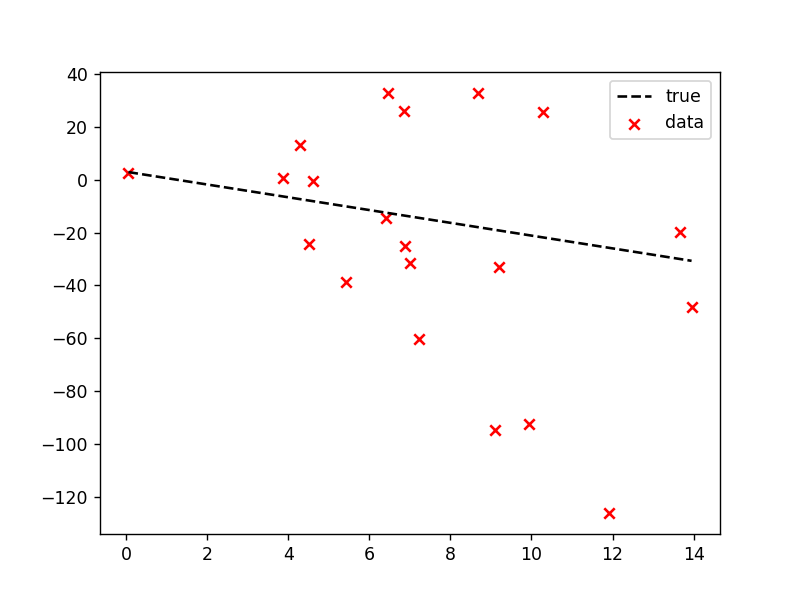

In [18]:
#Creation of the dataset
np.random.seed(8102)

def linear(x): return -2.42* x +3.1
def noise(x,n): return linear(x) + np.random.uniform(-10,10,n)*x

n_data=20
x_train=np.random.rand(n_data)*15
y_train=noise(x_train,n_data)
x_plot=np.linspace(min(x_train),max(x_train),1000)
y_plot=linear(x_plot)
plt.scatter(x_train,y_train,color='r',marker='x',label='data')
plt.plot(x_plot,y_plot,color='black',linestyle='--',label='true')
plt.legend()

In [19]:
def gram_mat(x):
    c=np.ones((x.shape[0],1))
    return np.c_[c,x]

def gram_mat_pol(x,n):
    return np.asarray([[x[j]**i for i in range(n+1) ] for j in range(len(x))])

def weights(X,Y):
    return np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,Y))

def reg(x,theta):
    return np.matmul(x,theta)

In [20]:
X=gram_mat(x_train)
Y=y_train[:,None]
theta=weights(X,Y)

<IPython.core.display.Javascript object>


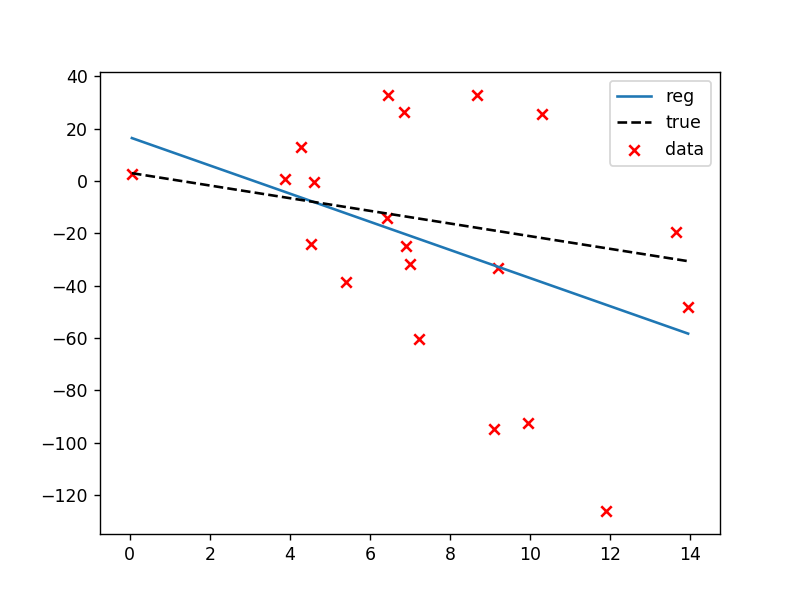

In [21]:
x_plot_reg=np.c_[np.ones(x_plot.shape),x_plot]
y_plot_reg=reg(x_plot_reg,theta.flatten())
plt.plot(x_plot,y_plot_reg.flatten(),label='reg')
plt.scatter(x_train,y_train,color='r',marker='x',label='data')
plt.plot(x_plot,y_plot,color='black',linestyle='--',label='true')
plt.legend()

In [22]:
np.random.seed(8102)

n_data,dim_in,dim_out=20,6,10
x_train=np.random.rand(n_data,dim_in)*1
y_train=np.random.randint(-10,10,(n_data,dim_out))

In [23]:
X=gram_mat(x_train)
Y=y_train
theta=weights(X,Y)

In [24]:
x_test=np.random.rand(1,dim_in)*30
x_test=gram_mat(x_test)
print(reg(x_test,theta))

[[-451.83541635  671.97985185 -195.13707726  -95.61198291  407.52566118
  -768.23752639 -101.08284294  492.41445623  257.70425908  698.54394848]]


<IPython.core.display.Javascript object>


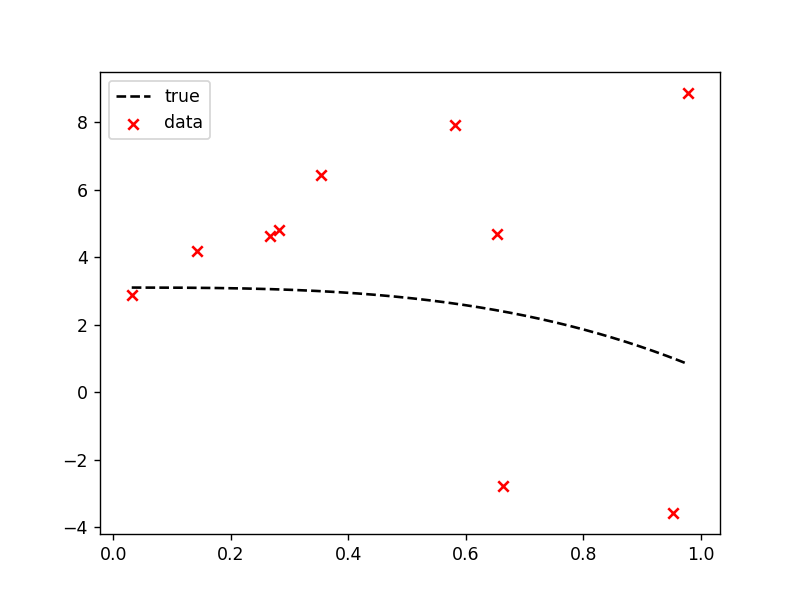

In [26]:
def pol(x): return -2.42* x**3 +3.1
def noise(x,n): return pol(x) + np.random.uniform(-10,10,n)*x

n_data,n_pol=10,3
x_train=np.random.rand(n_data)*1
y_train=noise(x_train,n_data)
x_plot=np.linspace(min(x_train),max(x_train),1000)
y_plot=pol(x_plot)
plt.scatter(x_train,y_train,color='r',marker='x',label='data')
plt.plot(x_plot,y_plot,color='black',linestyle='--',label='true')
plt.legend()

<IPython.core.display.Javascript object>


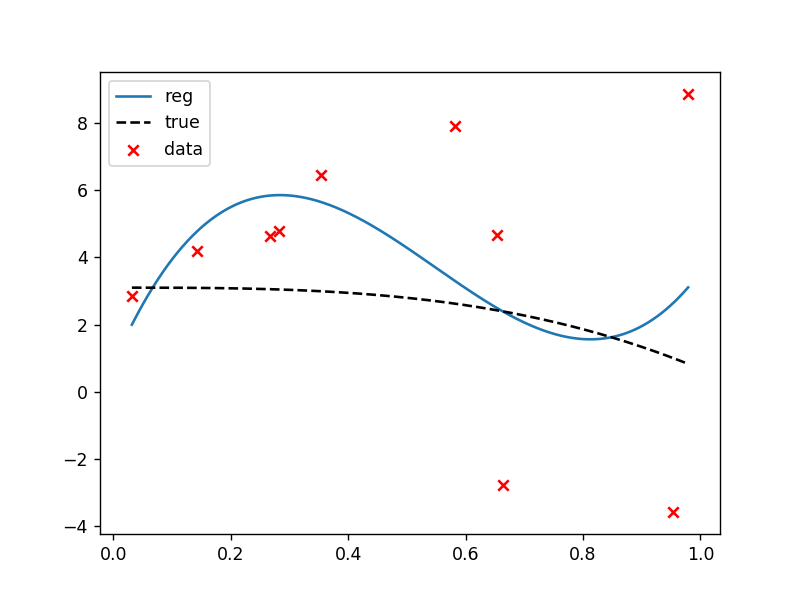

In [28]:
X=gram_mat_pol(x_train,n_pol)
Y=y_train[:,None]
theta=weights(X,Y)
x_plot_reg=gram_mat_pol(x_plot,n_pol)
y_plot_reg=reg(x_plot_reg,theta.flatten())
plt.plot(x_plot,y_plot_reg.flatten(),label='reg')
plt.scatter(x_train,y_train,color='r',marker='x',label='data')
plt.plot(x_plot,y_plot,color='black',linestyle='--',label='true')
plt.legend()

In [29]:
x_test=np.random.randint(-10,10,1)
x_test_reg=gram_mat_pol(x_test,n_pol)
print(reg(x_test_reg,theta))


[[9349.8604683]]


<IPython.core.display.Javascript object>


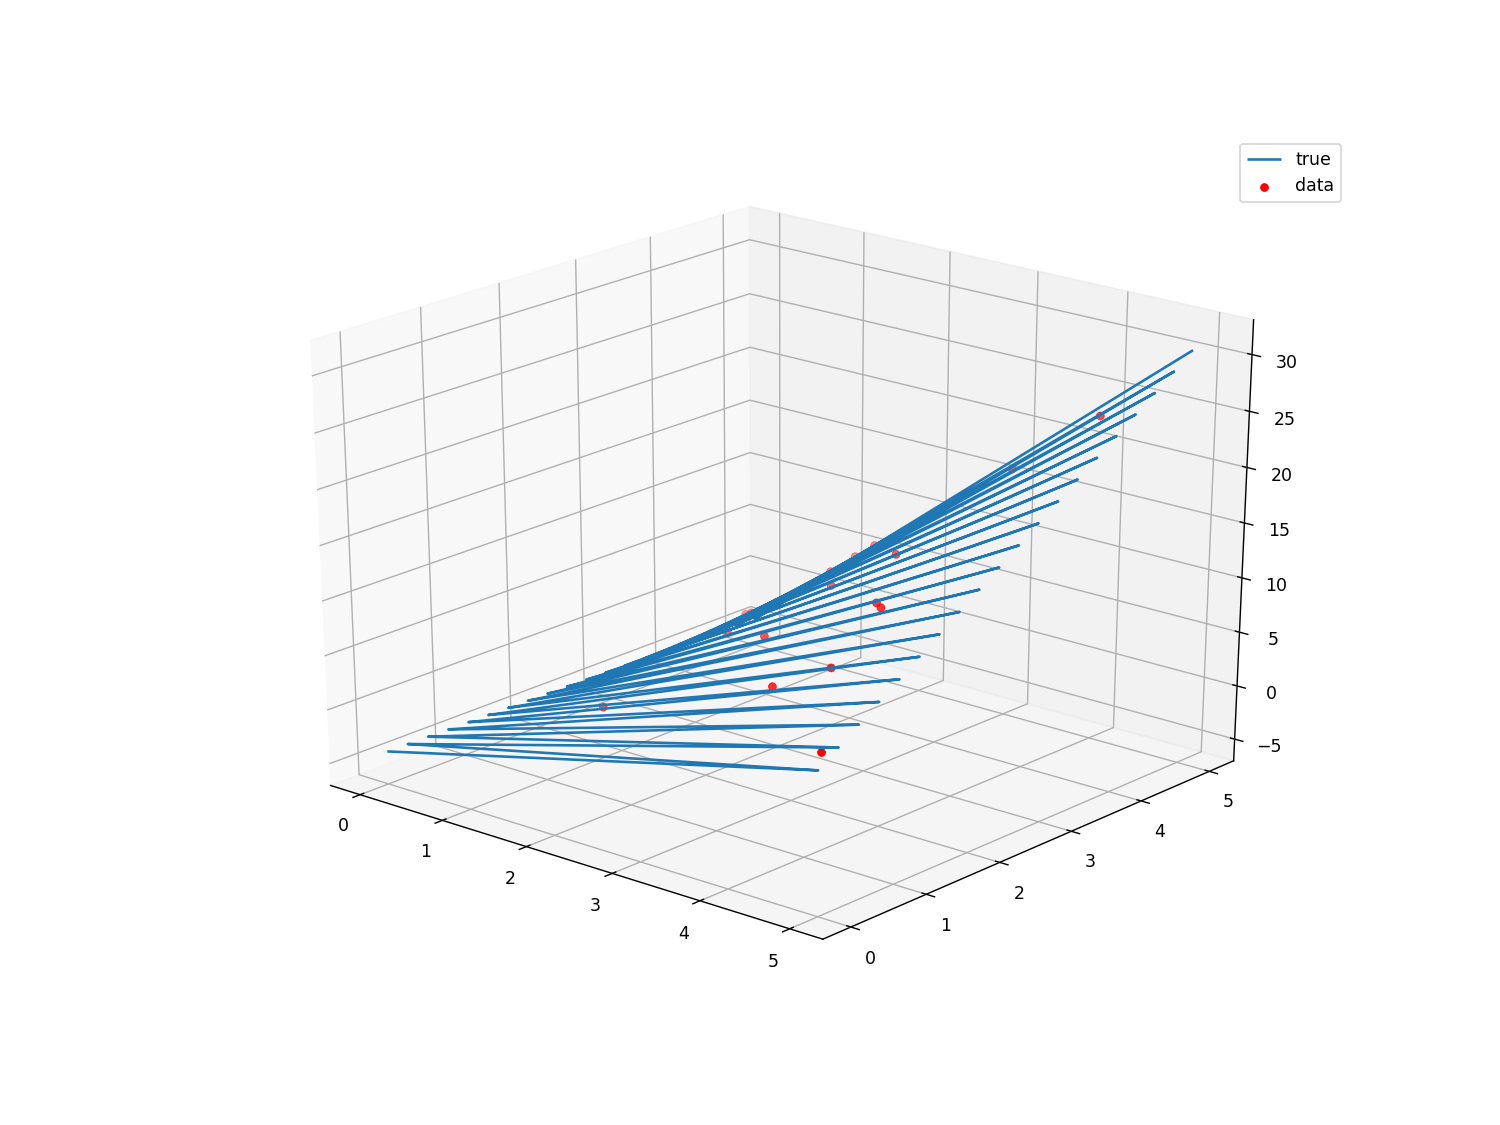

In [30]:
#Test 3-D Linear reg
def lin_2D(x):
    return x[:,0]* x[:,1]+2 * x[:,0]- .1* x[:,1]-4

n_data,dim_in,dim_out=20,2,1
x_train=np.random.rand(n_data,dim_in)*5
y_train=lin_2D(x_train)[:,None]
#y_train=np.random.randint(-10,10,(n_data,dim_out))

#surface data plot
x_plot= np.linspace(0, 5, 20)
x_plot = np.meshgrid(x_plot, x_plot)
x_mesh,y_mesh=x_plot
x_mesh,y_mesh=x_mesh.flatten()[:,None],y_mesh.flatten()[:,None]
z_mesh= lin_2D(np.hstack((x_mesh,y_mesh)))[:,None]

fig = plt.figure(figsize=(12,9))
ax = plt.axes(projection='3d')

ax.plot_wireframe(x_mesh, y_mesh, z_mesh,  cmap='viridis',label="true")
ax.scatter(x_train[:,0], x_train[:,1], y_train, color='r', linewidth=0.5,label='data');
ax.legend()

<IPython.core.display.Javascript object>


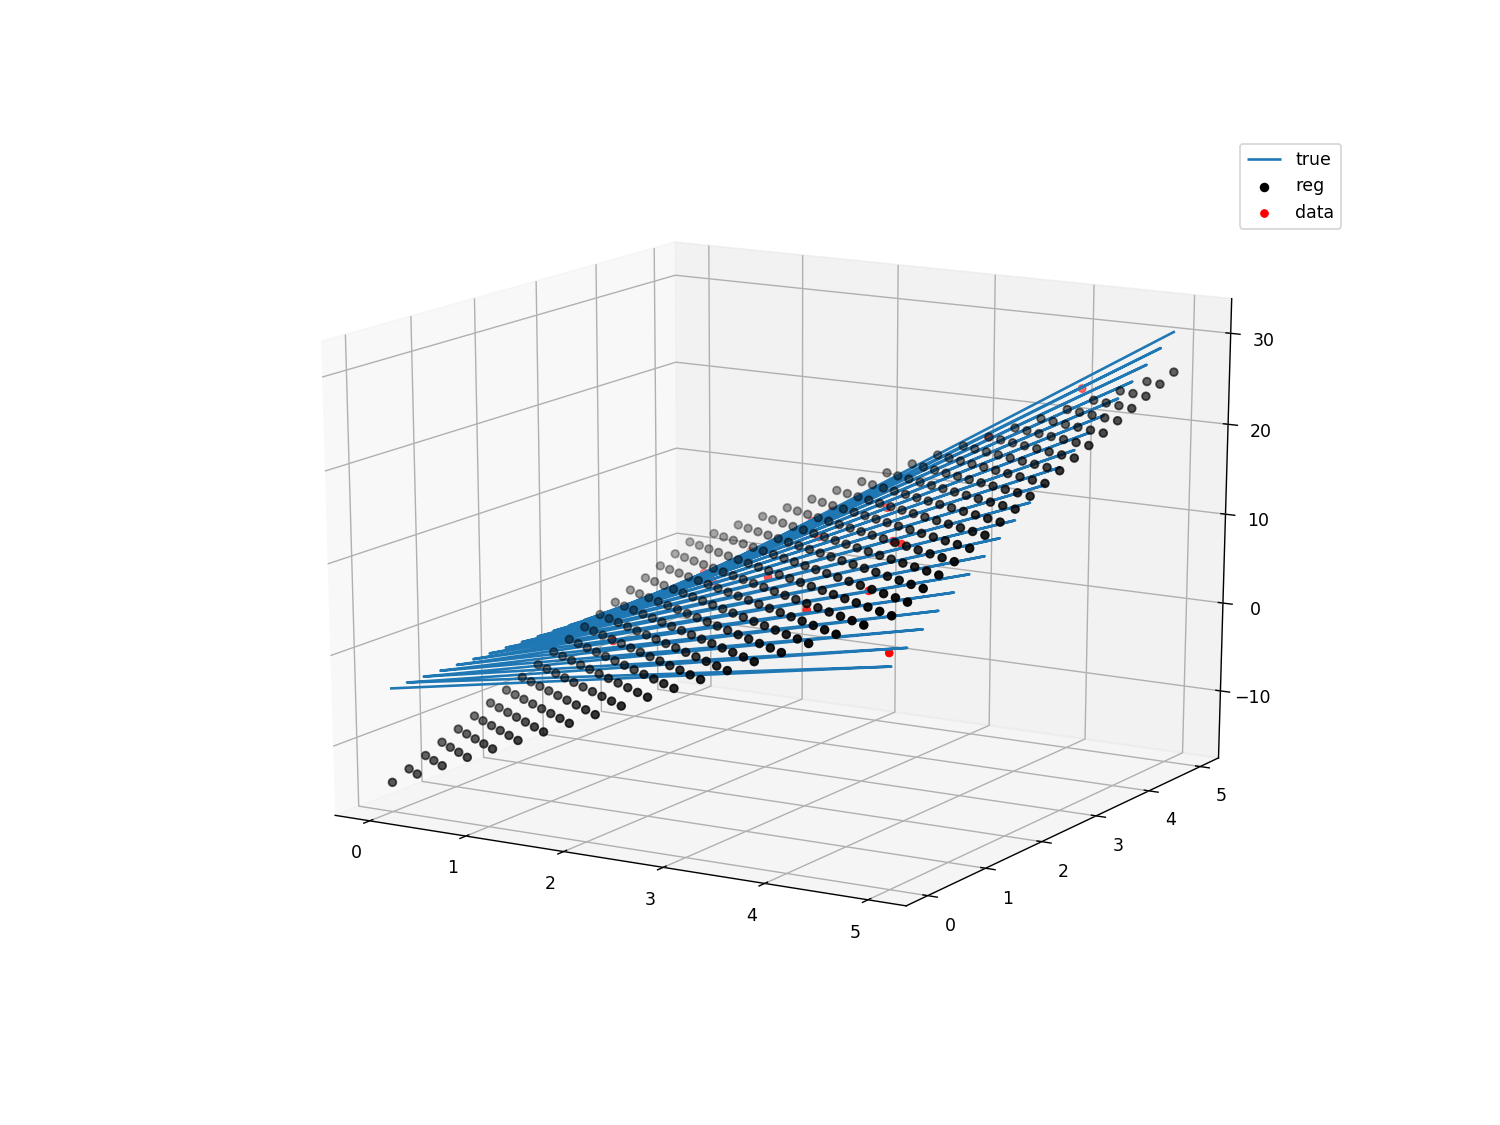

In [31]:
X=gram_mat(x_train)
Y=y_train
theta=weights(X,Y)
x_reg=np.hstack((x_mesh,y_mesh))
y_reg=reg(gram_mat(x_reg),theta)

fig = plt.figure(figsize=(12,9))
ax = plt.axes(projection='3d')
ax.plot_wireframe(x_mesh, y_mesh, z_mesh,  cmap='viridis',label='true')
ax.scatter(x_reg[:,0], x_reg[:,1], y_reg,  color='black', label='reg')
ax.scatter(x_train[:,0], x_train[:,1], y_train, color='r', linewidth=0.5,label='data');
ax.legend()